### 1. 모듈 경로 설정

In [1]:
import os
import sys
import torch
from PIL import Image

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

scripts_path = os.path.join(project_root, 'scripts')
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

yolov5_path = os.path.join(project_root, 'yolov5')
if yolov5_path not in sys.path:
    sys.path.append(yolov5_path)

from scripts.utils import *

/home/vscode/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2. 모델 파인튜닝

In [ ]:
# data.yaml 파일 경로 설정
data_yaml_path = '../yolov5/data/yolo/data.yaml'

# 모델 파인튜닝 실행
!python ../yolov5/train.py --img 640 --batch 16 --epochs 100 --data {data_yaml_path} --weights yolov5m.pt --cache

In [ ]:
download_images_from_rb()

In [ ]:
# data.yaml 파일 경로 설정
data_yaml_path = '../yolov5/data/roboflow/data.yaml'

# latest_exp_dir = find_latest_exp_dir()
# best_weights_path = os.path.join(latest_exp_dir, 'weights', 'best.pt')
# print(f'Using weights from: {best_weights_path}')

best_weights_path = "../yolov5/runs/train/exp3/weights/best.pt"


# 모델 파인튜닝 실행
!python ../yolov5/train.py --img 640 --batch 16 --epochs 10 --data {data_yaml_path} --weights {best_weights_path} --cache

### 3. 허깅페이스에 업로드

In [ ]:
hf_login()

latest_exp_dir = find_latest_exp_dir()

repo_name = "jspark2000/yolov5-vehicle"
local_model_dir = os.path.join(latest_exp_dir, 'weights')
filenames = ["best.pt", "last.pt"]

upload_model_to_hf(repo_name, local_model_dir, filenames)

### 4. 허깅페이스에서 다운로드 후 테스트

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/vscode/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-6-3 Python-3.11.9 torch-2.2.1 CPU

Found https://huggingface.co/jspark2000/yolov5-vehicle/resolve/main/best.pt locally at best.pt
Fusing layers... 
Model summary: 212 layers, 20893344 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


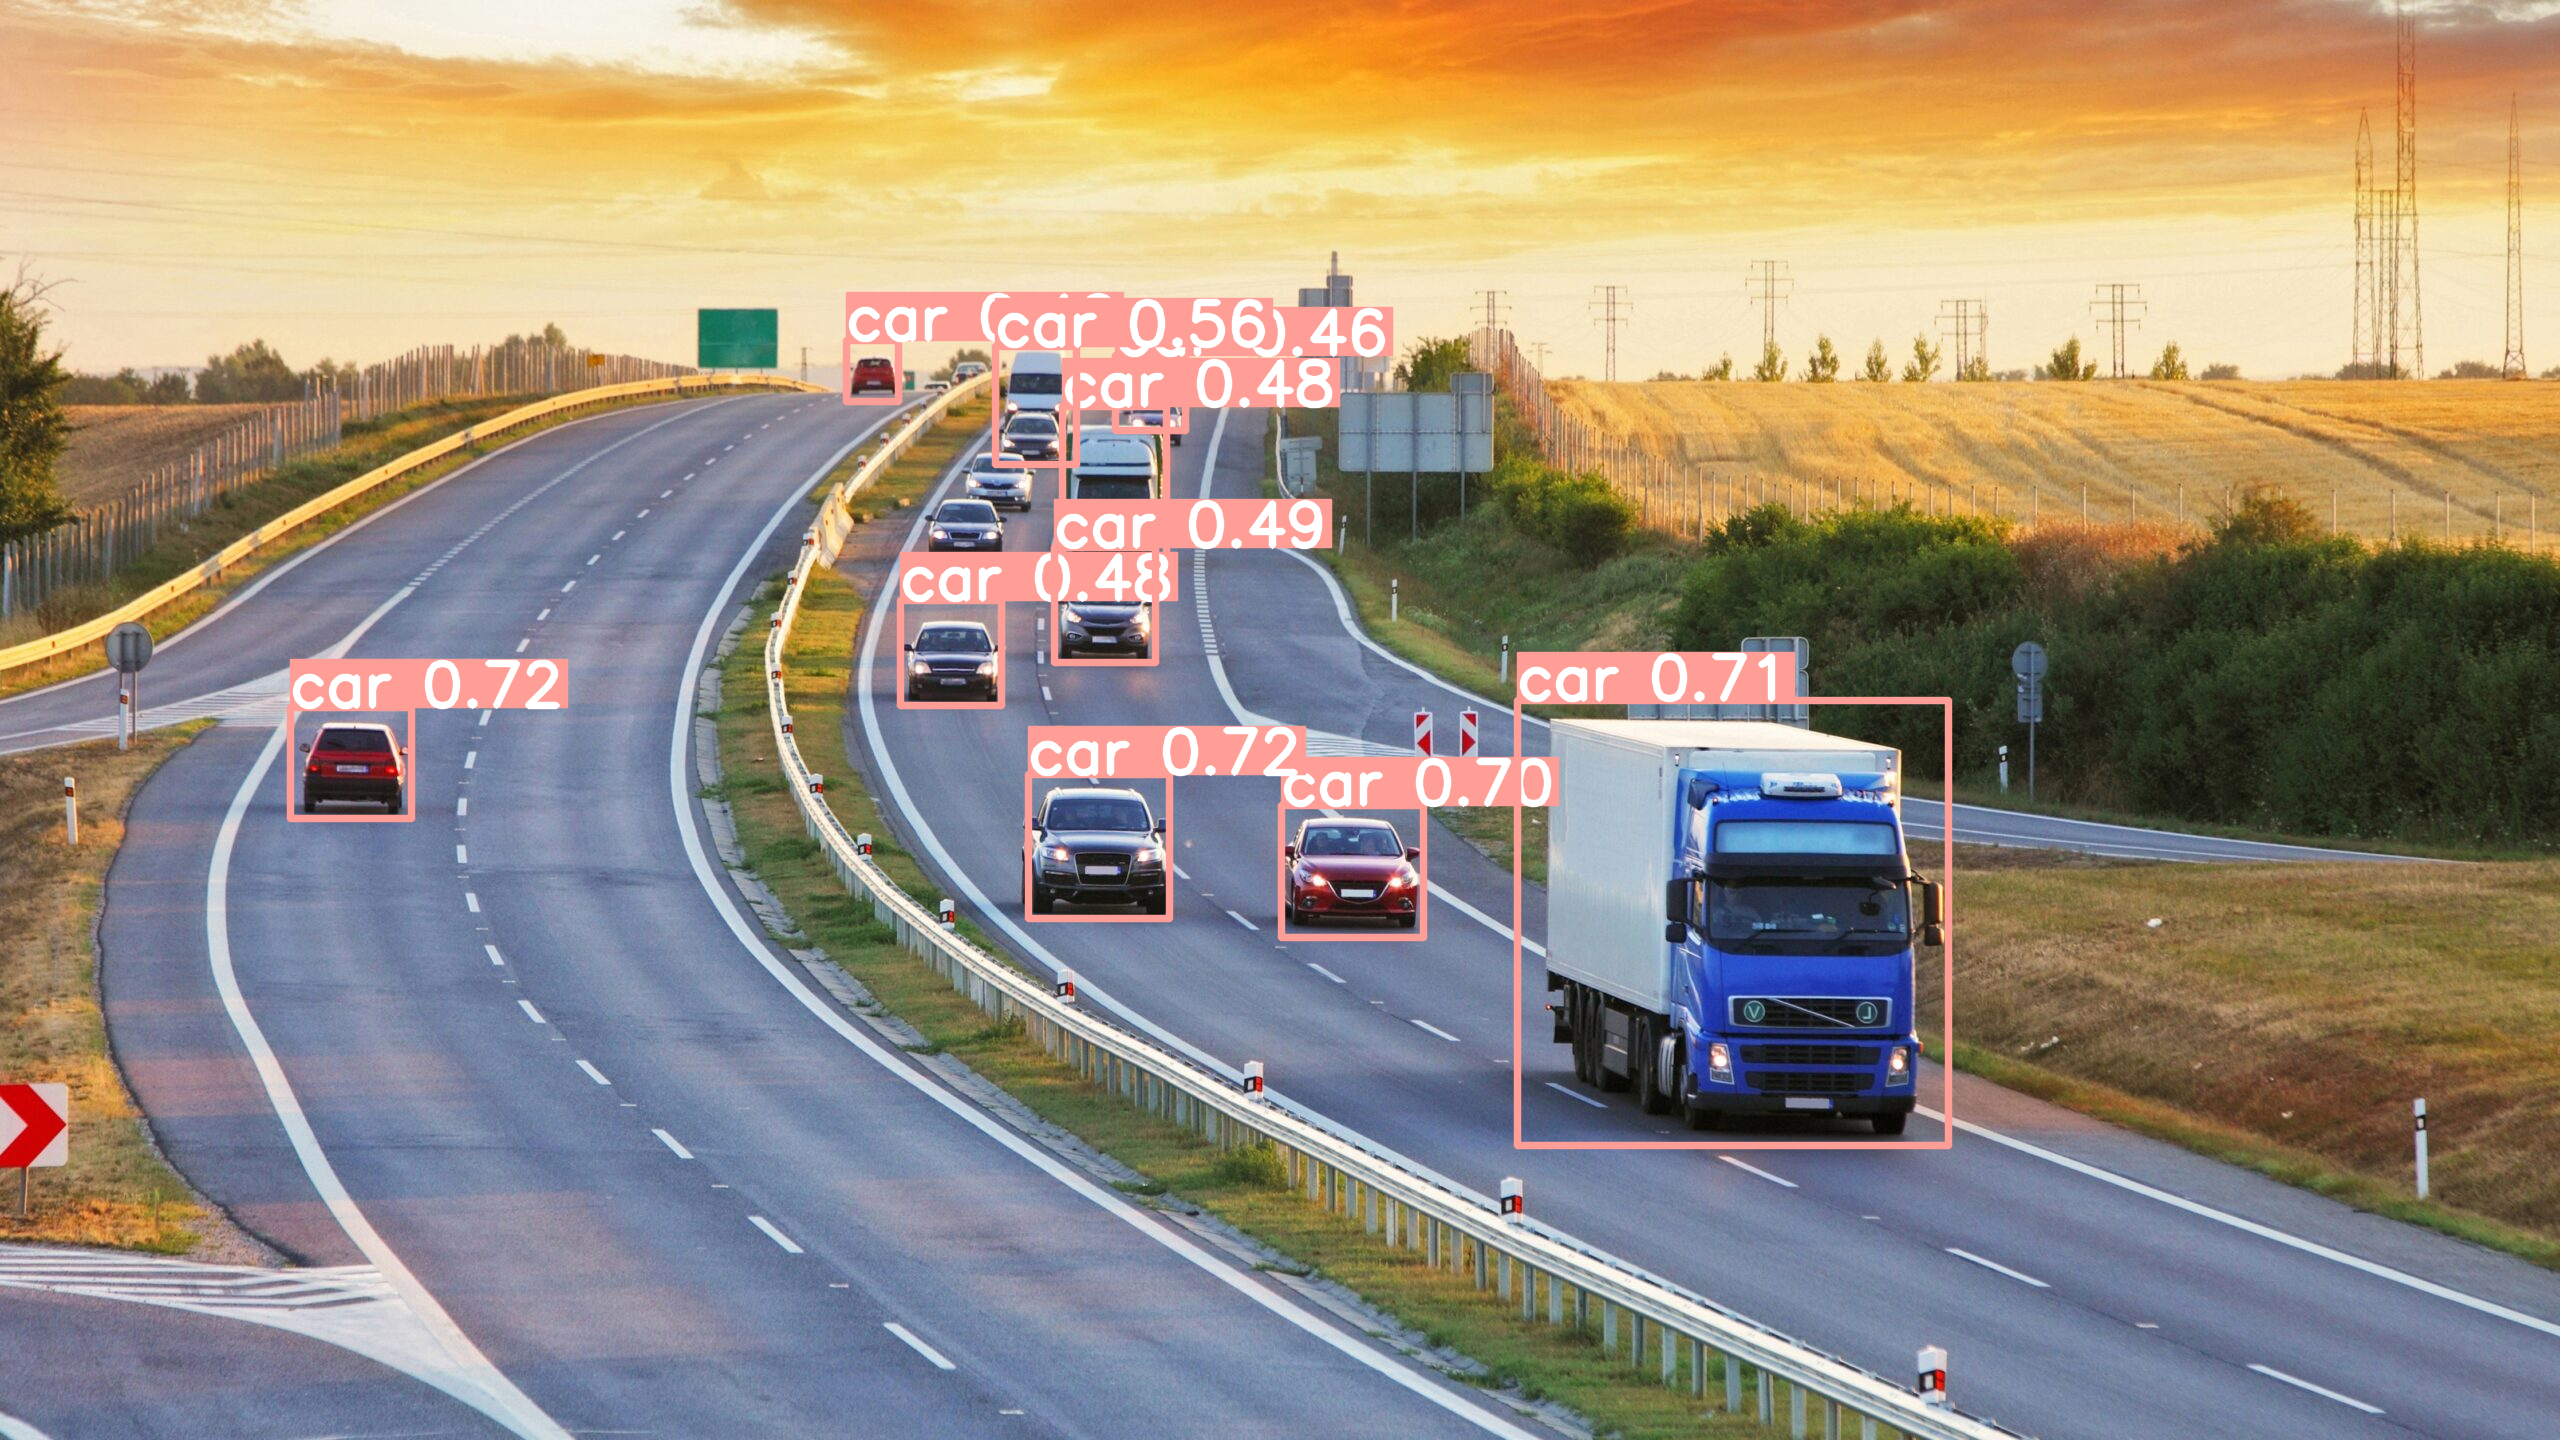

          xmin        ymin         xmax         ymax  confidence  class name
0   290.074036  707.811340   411.934875   818.804260    0.721457      1  car
1  1028.172607  774.639404  1169.833496   918.559937    0.717872      1  car
2  1517.569458  700.579285  1948.931030  1145.769531    0.714403      1  car
3  1281.472046  805.803589  1423.735229   937.150391    0.697395      1  car
4   995.431946  346.298859  1076.501465   464.907959    0.561964      1  car
5  1054.210083  547.149109  1155.213501   662.524231    0.488899      1  car
6   900.432129  600.914551  1001.549561   705.812378    0.482509      1  car
7  1062.990479  406.561035  1166.111328   589.696411    0.477368      1  car
8  1115.358154  355.562012  1185.239990   430.457031    0.461281      1  car
9   846.714172  340.761169   898.043762   401.945251    0.400929      1  car


In [3]:
hf_path = 'https://huggingface.co/jspark2000/yolov5-vehicle/resolve/main/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=hf_path, force_reload=True)

image_url = "../images/sample3.jpeg"
img = Image.open(image_url)

results = model(img)
results_df = results.pandas().xyxy[0]
results.show()

results_df.columns = ['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name']
print(results_df)